# Visualization

## Dependencies

In [2]:
from func import *
import matplotlib.pyplot as plt
import numpy as np
from encoder import *
import pickle
from pathlib import Path

## Basic Info

In [29]:
# ---load a normal mouse's data
all_data_dir=Path('./data/alldata/')
datalist=[x for x in all_data_dir.iterdir()]

data_dir=datalist[2] # load data
sample_name=str(data_dir).split('/')[-1]
print(f'mouse name:{sample_name}')

position,spikes=data_loader(data_dir)

# basic info

neuron_idx=50
time_bin_size=1/3 #second
num_time_bins,num_cells = spikes.shape

print(f"number of neurons in this mouse:{num_cells} \n")
print(f"loaded data: neuron {neuron_idx}")
print(f"time bin size:{round(time_bin_size,2)}s")
print(f"total time bins:{num_time_bins} ({round(num_time_bins*time_bin_size/60,2)}min)")
print(f"number of spikes:{sum(spikes[:,neuron_idx])}")

mouse name:M45_042718_OF
number of neurons in this mouse:66 

loaded data: neuron 50
time bin size:0.33s
total time bins:5394 (29.97min)
number of spikes:18


## Linear Gaussian Prediction Results
run `decoder.py` before the following code

### Results visulization of two sampels, one camkII, one control

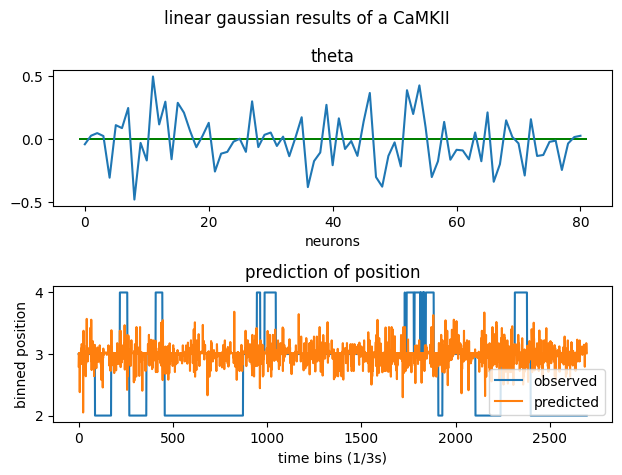

In [28]:
# load prediction results of a camkII
data_dir=datalist[1] # load data
sample_name=str(data_dir).split('/')[-1]
sample_type = "CaMKII" if "CaMKII" in sample_name else "Control"
with open(Path(f"../Output/data/linear_gaussian/lg_predict_{sample_type}.pickle"),"rb") as f:
    theta,prediction,binned_position_test=pickle.load(f)

# plot
plt.subplot(211)
plt.hlines([0]*len(theta[1:]),-1,len(theta)-1,colors="g",lw=.1)
plt.plot(theta[1:]) # exclude the offset
plt.title("theta")
plt.xlabel("neurons")

plt.subplot(212)
plt.plot(binned_position_test,label="observed")
plt.plot(prediction,label="predicted")
plt.title("prediction of position")
plt.legend(loc="lower right")
plt.xlabel("time bins (1/3s)")
plt.ylabel("binned position")

plt.suptitle(f"linear gaussian results of a {sample_type}")
plt.tight_layout()

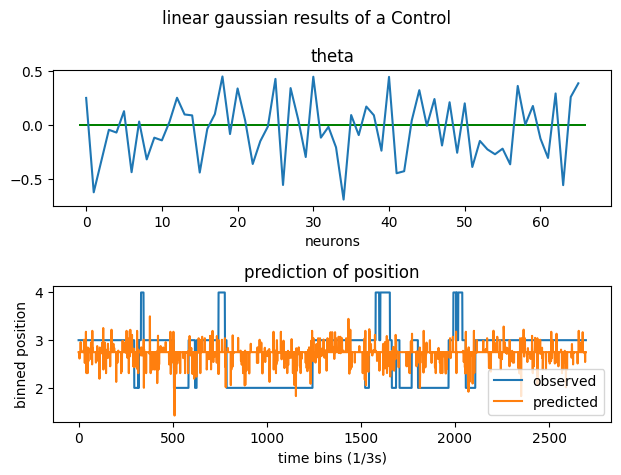

In [23]:
# load prediction results of a camkII
data_dir=datalist[2] # load data
sample_name=str(data_dir).split('/')[-1]
sample_type = "CaMKII" if "CaMKII" in sample_name else "Control"
with open(Path(f"../Output/data/linear_gaussian/lg_predict_{sample_type}.pickle"),"rb") as f:
    theta,prediction,binned_position_test=pickle.load(f)

# plot
plt.subplot(211)
plt.hlines([0]*len(theta[1:]),-1,len(theta)-1,colors="g",lw=.1)
plt.plot(theta[1:]) # exclude the offset
plt.title("theta")
plt.xlabel("neurons")

plt.subplot(212)
plt.plot(binned_position_test,label="observed")
plt.plot(prediction,label="predicted")
plt.title("prediction of position")
plt.legend(loc="lower right")
plt.xlabel("time bins (1/3s)")
plt.ylabel("binned position")

plt.suptitle(f"linear gaussian results of a {sample_type}")
plt.tight_layout()

### Overall results

In [ ]:
# load prediction results of a camkII
data_dir=datalist[1] # load data
sample_name=str(data_dir).split('/')[-1]
sample_type = "CaMKII" if "CaMKII" in sample_name else "Control"
with open(Path(f"../Output/data/lg_predict_{sample_type}.pickle"),"rb") as f:
    theta,prediction,binned_position_test=pickle.load(f)